# Pasos iniciales

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random
import matplotlib.cm as cm
import matplotlib as mpl

In [73]:
cmap = cm.get_cmap('viridis')
saltos = np.linspace(0.2, 1, 15)
colores = cmap(saltos)

In [74]:
entrenamiento = pd.read_csv('/content/drive/My Drive/Orga Datos/tp0 y tp1/Entrenamieto_ECI_2020.csv')
entrenamiento.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


# Conversion de moneda, todo a dolar

In [75]:
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'JPY', 'Total_Amount'] = entrenamiento['Total_Amount']*0.0096
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'JPY', 'Total_Amount_Currency'] = 'USD'

In [76]:
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'EUR', 'Total_Amount'] = entrenamiento['Total_Amount']*1.17
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'EUR', 'Total_Amount_Currency'] = 'USD'

In [77]:
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'AUD', 'Total_Amount'] = entrenamiento['Total_Amount']*0.70
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'AUD', 'Total_Amount_Currency'] = 'USD'

In [78]:
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'GBP', 'Total_Amount'] = entrenamiento['Total_Amount']*1.29
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'GBP', 'Total_Amount_Currency'] = 'USD'

# Hay que filtrar

In [79]:
df = entrenamiento.loc[:,['Territory', 'TRF']]

In [80]:
grouped = df.groupby('Territory').agg({'TRF':'sum','Territory':'count'})
grouped.rename(columns={'TRF':'Total TRF', 'Territory':'Total opportunities'}, inplace=True)
grouped.sort_values('Total TRF', ascending=False, inplace=True)
grouped

,Total TRF,Total opportunities
Territory,,
Australia,6866,1208
NW America,4959,1568
SE America,4342,493
None,3846,4999
NE America,3464,760
...,...,...
Malta,0,6
Monaco,0,1
Burma,0,1


# Oportunidades por Pais


In [81]:
oportunidades_por_pais = grouped['Total opportunities'].to_frame()
oportunidades_por_pais.reset_index(inplace=True)
oportunidades_por_pais

,Territory,Total opportunities
0,Australia,1208
1,NW America,1568
2,SE America,493
3,None,4999
4,NE America,760
...,...,...
71,Malta,6
72,Monaco,1
73,Burma,1
74,New Zealand,38


### Con No_especificados

In [82]:
top10 = oportunidades_por_pais.nlargest( 10, 'Total opportunities')
top10.replace('None','No_especificado', inplace=True)
top10

,Territory,Total opportunities
3,No_especificado,4999
5,Germany,1682
1,NW America,1568
0,Australia,1208
6,India,809
4,NE America,760
15,Japan,681
9,Netherlands,533
2,SE America,493
8,France,449


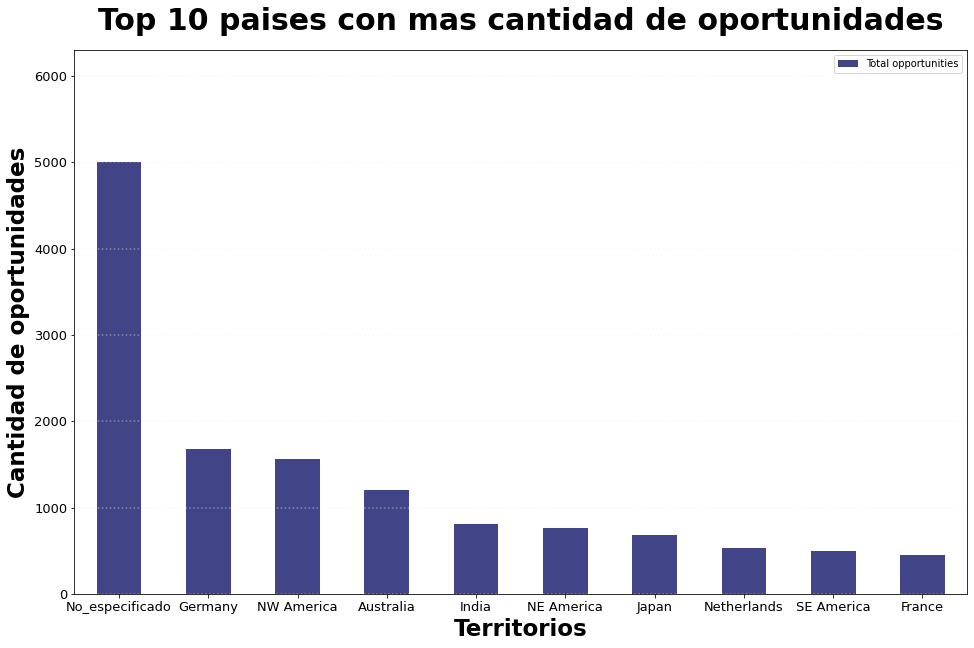

In [83]:
grafiquito = top10.plot(kind='bar', x='Territory', figsize=(16,10), rot=360, color=colores, fontsize=13)
ax = plt.gca()
plt.title('Top 10 paises con mas cantidad de oportunidades', fontsize=30, fontweight='bold', pad=20)
ax.set_ylabel('Cantidad de oportunidades',fontsize=23, fontweight='bold')
ax.set_xlabel('Territorios', fontsize=23, fontweight='bold')


lineas = grafiquito.get_yticks()
for i in lineas:
      grafiquito.axhline(y=i, linestyle=':', alpha=0.4, color='#eeeeee')

### Sin No_especificados

In [84]:
top10_sin_none = oportunidades_por_pais[ oportunidades_por_pais['Territory'] != 'None' ].nlargest(10, 'Total opportunities')
top10_sin_none

,Territory,Total opportunities
5,Germany,1682
1,NW America,1568
0,Australia,1208
6,India,809
4,NE America,760
15,Japan,681
9,Netherlands,533
2,SE America,493
8,France,449
32,Singapore,441


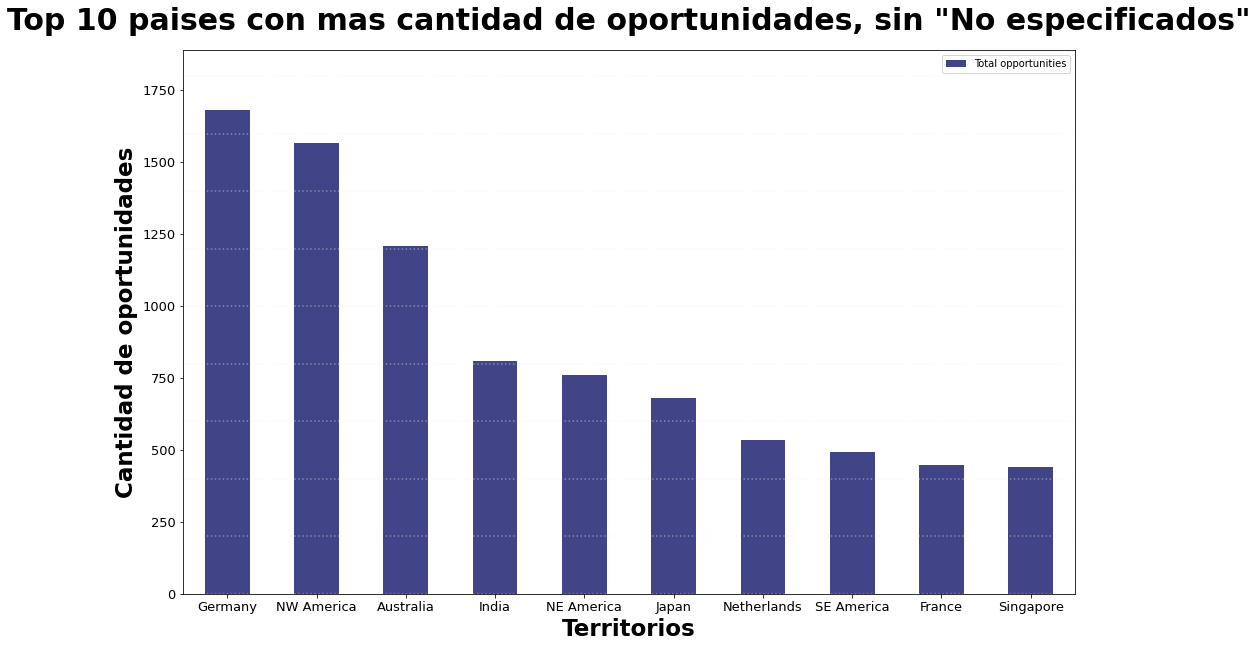

In [85]:
grafiquito = top10_sin_none.plot(kind='bar', x='Territory', figsize=(16,10), rot=360, color=colores, fontsize=13)
ax = plt.gca()
plt.title('Top 10 paises con mas cantidad de oportunidades, sin "No especificados"', fontsize=30, fontweight='bold', pad=20)
ax.set_ylabel('Cantidad de oportunidades',fontsize=23, fontweight='bold')
ax.set_xlabel('Territorios', fontsize=23, fontweight='bold')


lineas = grafiquito.get_yticks()
for i in lineas:
      grafiquito.axhline(y=i, linestyle=':', alpha=0.4, color='#eeeeee')

# Se me ocurrio comparar con un Scatterplot la cantidad de oportunidades por territorio, y el total amount

In [90]:
df = entrenamiento.loc[:,["Territory","Total_Amount"]]
df

,Territory,Total_Amount
0,None,6169176.00
1,None,56429.10
2,NW America,83865.60
3,NW America,7421881.50
4,NW America,13357192.50
...,...,...
16942,Austria,120919.50
16943,Austria,108827.55
16944,Austria,120919.50
16945,NE America,2346796.88


In [92]:
grouped = df.groupby('Territory').agg({'Total_Amount':'sum','Territory':'count'})
grouped.rename(columns={'Total_Amount':'Total_Amount per territory', 'Territory':'Total opportunities'}, inplace=True)
grouped.sort_values('Total_Amount per territory', ascending=False, inplace=True)
grouped

,Total_Amount per territory,Total opportunities
Territory,,
Australia,2.402488e+09,1208
NW America,2.161057e+09,1568
SE America,2.057781e+09,493
None,1.946274e+09,4999
NE America,1.637583e+09,760
...,...,...
Czech Republic,1.186380e+05,1
Monaco,1.157861e+05,1
Georgia,1.000350e+05,1


Text(0, 0.5, 'Monto total por territorio')

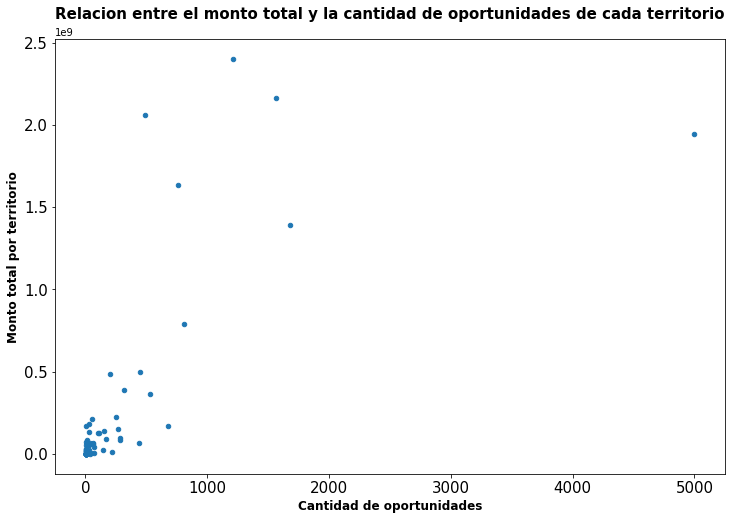

In [105]:
grouped.plot(kind='scatter', y="Total_Amount per territory",x='Total opportunities', figsize=(12,8), fontsize=15)
ax = plt.gca()
plt.title('Relacion entre el monto total y la cantidad de oportunidades de cada territorio', fontsize=15, fontweight='bold', pad=20)
ax.set_xlabel('Cantidad de oportunidades',fontsize=12, fontweight='bold')
ax.set_ylabel('Monto total por territorio', fontsize=12, fontweight='bold')